# Vectorization Layer (Practice)

Use the following [dataset](https://drive.google.com/file/d/1uUtuiAM1AqGvDMrd3-L8vLFfHPrt3pWG/view) to train your vectorization layer. This is the "spooky" dataset and represents passages from three famous authors: Edgar Allan Poe, HP Lovecraft, and Mary Shelley. The ultimate goal is a multi-class text classification matching each passage to the correct author.
1. 
Prepare the datase

  t:
Load in the dataset with 'id" as the index col

umn
Determine the sequence length of each document in the corpus by using a lambda function to split the text on the spaces
What is the range of sequence lengths?
What is the average sequence l

ength?
Use the RandomUnderSampler to balance the data based on the "author" 

column.
Change the author strings to integers using the following mapping:
EAP: 0
HPL
: 1
MWS: 2
Define X as the values from the "text" column.
Define y as the "au

thor" column.
Convert to a dataset object using Dataset.from_t

ensor_slices()
Train, val, test, split with a .7, .2, .1 ratio using the take, skip, approach
Shuffle the training dataset.
Add batching to all 3 splits using a 

batch size of 32.
Build a text vectorization layer to create integer sequences of each text.
Use an output sequence length of 100
Use a standardization method of "lower_an

d_strip_punctuation"
Obtain the text from the training dataset us

ing a lambda function
Train (adapt) the vectorization 

layer on the text data
What is the 

size of the vocabulary?
Create a look-up dictionary that will allow you to look up the word associated with an integer.
What word is asso


c2. iated with integer 1000?
Obtain the vectorized result of the sample text: "Text Vectorization is an essential tool for converting text into a format that machine learning models can use."



Use the following [dataset](https://drive.google.com/file/d/1uUtuiAM1AqGvDMrd3-L8vLFfHPrt3pWG/view) to train your vectorization layer. This is the "spooky" dataset and represents passages from three famous authors: Edgar Allan Poe, HP Lovecraft, and Mary Shelley. The ultimate goal is a multi-class text classification matching each passage to the correct author.

- Prepare the Dataset :

 - Load in the dataset with 'id' as the index column.
 - Determine the sequence length of each document in the corpus by using a lambda function to split the text on the spaces:
   - What is the range of sequence lengths?
   - What is the average sequence length?

 - Use the RandomUnderSampler to balance the data based on the "author" column.
 - Change the author strings to integers using the following mapping:
   - EAP: 0
   - HPL: 1
   - MWS: 2

 - Define `X` as the values from the "text" column.
 - Define `y` as the "author" column.
 - Convert the dataset to a TensorFlow dataset object using `Dataset.from_tensor_slices()`.

 - Split the dataset into train, validation, and test sets with a 70-20-10 ratio using the `take`, `skip` approach:
   - Shuffle the training dataset.
   - Add batching to all three splits using a batch size of 32.



- Build a text vectorization layer to create integer sequences of each text. Use the following settings for the vectorization layer:
  - Output sequence length of 100.
  - Standardization method of "lower_and_strip_punctuation".



- Obtain the text from the training dataset using a lambda function.



- Train (adapt) the vectorization layer on the text data:
  - What is the size of the vocabulary?



- Create a look-up dictionary that will allow you to look up the word associated with an integer:
  - What word is associated with integer 1000?



- Obtain the vectorized result of the sample text: 
  _"Text Vectorization is an essential tool for converting text into a format that machine learning models can use."_


In [28]:
import pandas as pd
import numpy as np

import tensorflow as tf
# Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
# run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

from tensorflow.keras import layers 
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import optimizers 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn import set_config
set_config(transform_output = 'pandas')
pd.set_option('display.max_colwidth', 250)

In [29]:
df = pd.read_csv('Data/spooky.csv', index_col='id')
df

,text,author
id,,
id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL
...,...,...
id17718,"I could have fancied, while I looked at it, that some eminent landscape painter had built it with his brush.",EAP
id08973,The lids clenched themselves together as if in a spasm.,EAP
id05267,"Mais il faut agir that is to say, a Frenchman never faints outright.",EAP


In [30]:
df.duplicated().sum()

0

In [31]:
# Determine the sequence length of each document in the corpus by using a lambda function to split the text on the spaces
seq_length = df['text'].map(lambda x : len(x.split()))
# Determine the range of sequence lengths
range_of_lengths = max(seq_length) - min(seq_length)
print(f"Range of sequence lengths: {range_of_lengths} with maximum length = {max(seq_length)} and minimum length = {min(seq_length)}")
# Determine the average of sequence lengths
average_of_lengths = seq_length.mean()
print("Average of sequence lengths:", round(average_of_lengths,2))

Range of sequence lengths: 859 with maximum length = 861 and minimum length = 2
Average of sequence lengths: 26.73


In [32]:
df['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [33]:
# Use the RandomUnderSampler to balance the data based on the "author" column.
rus = RandomUnderSampler(random_state = 42)
df, _ = rus.fit_resample(df, df['author'])
df['author'].value_counts()

EAP    5635
HPL    5635
MWS    5635
Name: author, dtype: int64

In [34]:
# Change the author strings to integers using the following mapping: EAP: 0, HPL: 1, MWS: 2
## Mapping dictionary
author_mapping = {'EAP': 0, 'HPL': 1, 'MWS': 2}

## Replace author strings with integers based on the mapping
df['author'] = df['author'].map(author_mapping)

df.head()

,text,author
id,,
id22483,"He then asked me, suddenly, if I had observed any thing peculiar at the scene of the atrocity.",0
id18809,"Through the exertions of Beauvais, the matter was industriously hushed up, as far as possible; and several days had elapsed before any public emotion resulted.",0
id16322,"The cold was intense, and obliged me to wrap up closely in an overcoat.",0
id13423,"I observed that, upon her first elevation of the glass, she had seemed satisfied with a momentary inspection of my person, and was withdrawing the instrument, when, as if struck by a second thought, she resumed it, and so continued to regard me w...",0
id09553,There can be no doubt that the consciousness of the rapid increase of my superstition for why should I not so term it?,0


In [35]:
# Define X as the values from the "text" column. Define y as the "author" column.

X = df['text'].values
y = df['author']

In [36]:
# Convert to a dataset object using Dataset.from_tensor_slices()
ds = tf.data.Dataset.from_tensor_slices((X,y))
ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [37]:
# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False) 

# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )

# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)

# Set the batch size
BATCH_SIZE =32


import math
# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)

print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")

    - train:	11833 samples 	(370 batches)
    - val:  	3381 samples 	(106 batches)
    - test: 	1691 samples 	(53 batches)


In [38]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)

# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)

# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)

In [39]:
# Define sequnce length
SEQUENCE_LENGTH = 100

In [40]:
# Create text Vectorization layer
sequence_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length= SEQUENCE_LENGTH)


In [41]:
# Obtain the text from the training dataset using a lambda function
ds_texts = train_ds.map(lambda x ,y : x) 


In [42]:
# Train (adapt) the vectorization layer on the text data
sequence_vectorizer.adapt(ds_texts)

In [43]:
# Get vocabulary size
VOCAB_SIZE =  sequence_vectorizer.vocabulary_size()
VOCAB_SIZE

20976

In [44]:
# Create a look-up dictionary that will allow you to look up the word associated with an integer. 

vocab = sequence_vectorizer.get_vocabulary()
int_to_str = {idx: word for idx, word in enumerate(vocab)}

int_to_str


{0: '',
 1: '[UNK]',
 2: 'the',
 3: 'of',
 4: 'and',
 5: 'to',
 6: 'i',
 7: 'a',
 8: 'in',
 9: 'was',
 10: 'that',
 11: 'my',
 12: 'it',
 13: 'he',
 14: 'had',
 15: 'with',
 16: 'his',
 17: 'as',
 18: 'for',
 19: 'but',
 20: 'which',
 21: 'not',
 22: 'me',
 23: 'at',
 24: 'from',
 25: 'by',
 26: 'on',
 27: 'this',
 28: 'is',
 29: 'her',
 30: 'be',
 31: 'were',
 32: 'have',
 33: 'you',
 34: 'all',
 35: 'an',
 36: 'we',
 37: 'or',
 38: 'no',
 39: 'when',
 40: 'him',
 41: 'one',
 42: 'so',
 43: 'they',
 44: 'been',
 45: 'could',
 46: 'would',
 47: 'she',
 48: 'there',
 49: 'upon',
 50: 'more',
 51: 'its',
 52: 'their',
 53: 'now',
 54: 'what',
 55: 'some',
 56: 'our',
 57: 'into',
 58: 'if',
 59: 'them',
 60: 'who',
 61: 'are',
 62: 'will',
 63: 'than',
 64: 'then',
 65: 'only',
 66: 'very',
 67: 'up',
 68: 'before',
 69: 'man',
 70: 'about',
 71: 'even',
 72: 'these',
 73: 'out',
 74: 'yet',
 75: 'your',
 76: 'time',
 77: 'did',
 78: 'any',
 79: 'old',
 80: 'said',
 81: 'might',
 82: 'li

In [45]:
# What word is associated with integer 1000?
int_to_str[1000]


'occasion'

In [46]:
# Obtain the vectorized result of the sample text: "Text Vectorization is an essential tool for converting text into a format that machine learning models can use."
sequence = sequence_vectorizer(["Text Vectorization is an essential tool for converting text into a format that machine learning models can use."])
sequence

<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[ 6345,     1,    28,    35,  6996, 13401,    18,     1,  6345,
           57,     7,     1,    10,   833,  3862, 16160,   122,   521,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]], dtype=int64)>

# Text Classificaiton with RNNs (Core)

Now, you will try to improve the performance of the RNN model.

You will build, fit, and evaluate at least 3 models using architecture or techniques you have learned in the course. Consider stacked RNNs, bi-directional RNNs, pre-trained word embeddings, pooling layers, dropout layers, and tuning of hyperparameters. Your goal should be to achieve the highest accuracy possible. An accuracy score above 80% is achievable.

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import custom_functions as fn

In [48]:
# Define classes
classes = y.unique()
classes

array([0, 1, 2], dtype=int64)

In [49]:
# Define output dimension
EMBED_DIM = 150

In [50]:
def get_callbacks(patience=3, monitor='val_accuracy'):
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
    return [early_stop]

In [51]:
def build_gru_model_stack_deep_pool(text_vectorization_layer):
    
    model = tf.keras.Sequential([text_vectorization_layer,
                                layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH)])

    # Stack three GrU layers    
    model.add(layers.GRU(128, return_sequences=True))
    model.add(layers.Dropout(.5))
    model.add(layers.GRU(128, return_sequences=True))
    model.add(layers.Dropout(.5))         
    # For the final GRU layer, use return_sequences = True for pooling layer
    model.add(layers.GRU(128, return_sequences = True)) 
    model.add(layers.GlobalMaxPooling1D())
    
    # Output layer
    model.add(layers.Dense(len(classes), activation='softmax'))
              
    # Define optimizer
    optimizer = optimizers.legacy.Adam()

    # Compile
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [52]:
def build_gru_model_stack_hierarchy_pool(text_vectorization_layer):
    
    model = tf.keras.Sequential([text_vectorization_layer,
                                layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH)])

    # Stack three GrU layers    
    model.add(layers.GRU(128, return_sequences=True))
    model.add(layers.Dropout(.5))
    model.add(layers.GRU(64, return_sequences=True))
    model.add(layers.Dropout(.5))         
    # For the final GRU layer, use return_sequences = True for pooling layer
    model.add(layers.GRU(32, return_sequences = True)) 
    model.add(layers.GlobalMaxPooling1D())
    
    # Output layer
    model.add(layers.Dense(len(classes), activation='softmax'))
              
    # Define optimizer
    optimizer = optimizers.legacy.Adam()

    # Compile
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.summary()
    return model



In [53]:
def build_gru_model_bi_pool(text_vectorization_layer):
    
    gru_model_bi_pool = Sequential([text_vectorization_layer,
                        layers.Embedding(input_dim= VOCAB_SIZE , output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH)])
        
    # Add bidirectional component to GRU layer 
    gru_model_bi_pool.add(layers.Bidirectional(layers.GRU(128, return_sequences = True)))
    
    # Add a pooling layer 
    gru_model_bi_pool.add(layers.GlobalMaxPooling1D())
    
    # Output layer
    gru_model_bi_pool.add(layers.Dense(len(classes), activation='softmax'))

    # Define optimizer
    optimizer = optimizers.legacy.Adam()

    # Compile
    gru_model_bi_pool.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   
    gru_model_bi_pool.summary()
    return gru_model_bi_pool


## Stacked GRU (3 layers with same units)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 100, 150)          3146400   
                                                                 
 gru_3 (GRU)                 (None, 100, 128)          107520    
                                                                 
 dropout_2 (Dropout)         (None, 100, 128)          0         
                                                                 
 gru_4 (GRU)                 (None, 100, 128)          99072     
                                                                 
 dropout_3 (Dropout)         (None, 100, 128)          0         
                                                      

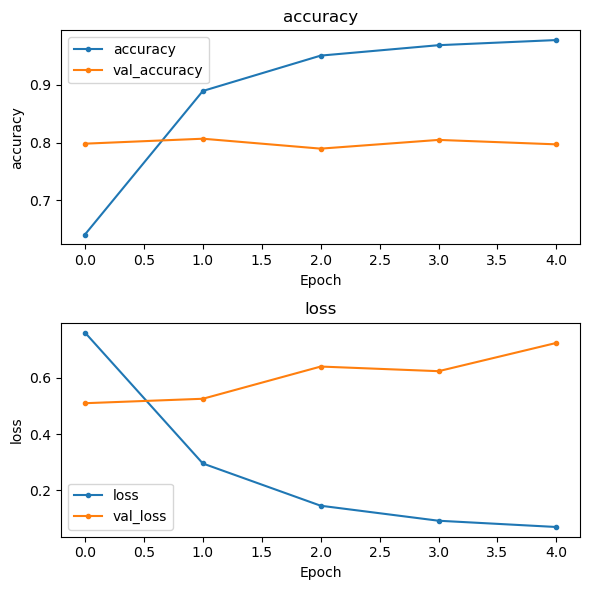


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3906
           1       1.00      0.99      0.99      3952
           2       0.99      0.99      0.99      3975

    accuracy                           0.99     11833
   macro avg       0.99      0.99      0.99     11833
weighted avg       0.99      0.99      0.99     11833



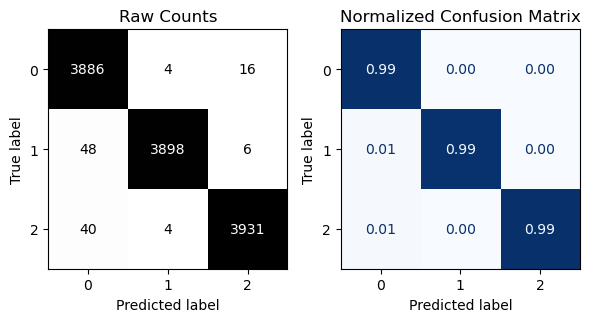


- Evaluating Training Data:
370/370 [==============================] - 80s 216ms/step - loss: 0.0323 - accuracy: 0.9900
{'loss': 0.03226202353835106, 'accuracy': 0.990027904510498}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       559
           1       0.87      0.74      0.80       560
           2       0.82      0.84      0.83       572

    accuracy                           0.80      1691
   macro avg       0.81      0.80      0.80      1691
weighted avg       0.81      0.80      0.80      1691



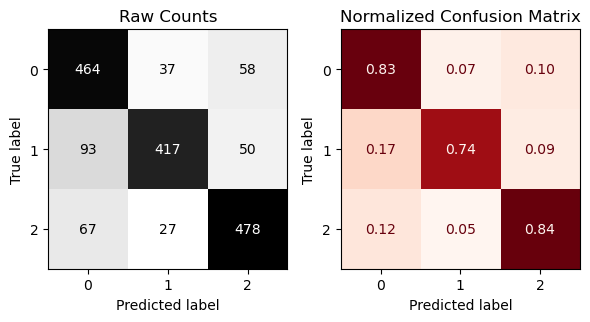


- Evaluating Test Data:
53/53 [==============================] - 10s 185ms/step - loss: 0.7171 - accuracy: 0.8037
{'loss': 0.7171363830566406, 'accuracy': 0.8036664724349976}


In [54]:
# Build model
model1 = build_gru_model_stack_deep_pool(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = model1.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks())

# Obtain the results
results = fn.evaluate_classification_network(model1, X_train=train_ds, X_test=test_ds, history=history);

## Stacked GRU (3 layers with decreased units)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 100, 150)          3146400   
                                                                 
 gru_6 (GRU)                 (None, 100, 128)          107520    
                                                                 
 dropout_4 (Dropout)         (None, 100, 128)          0         
                                                                 
 gru_7 (GRU)                 (None, 100, 64)           37248     
                                                                 
 dropout_5 (Dropout)         (None, 100, 64)           0         
                                                      

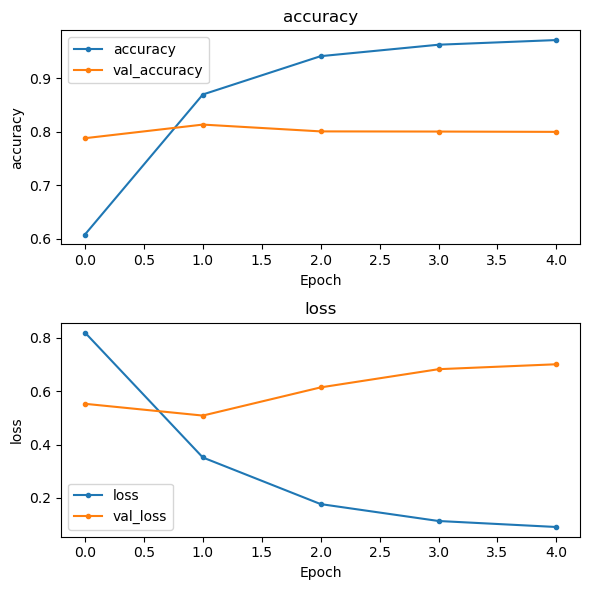


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3906
           1       1.00      0.99      0.99      3952
           2       1.00      0.98      0.99      3975

    accuracy                           0.99     11833
   macro avg       0.99      0.99      0.99     11833
weighted avg       0.99      0.99      0.99     11833



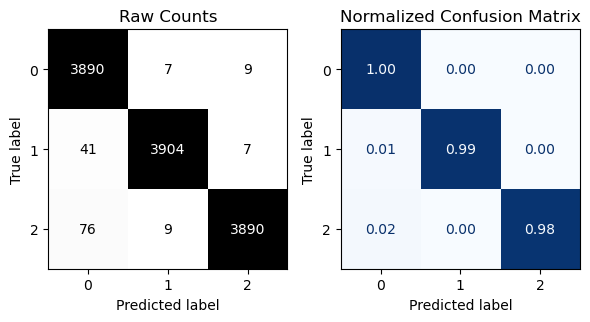


- Evaluating Training Data:
370/370 [==============================] - 50s 134ms/step - loss: 0.0393 - accuracy: 0.9874
{'loss': 0.03934142738580704, 'accuracy': 0.9874081015586853}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       559
           1       0.84      0.83      0.83       560
           2       0.86      0.78      0.82       572

    accuracy                           0.81      1691
   macro avg       0.82      0.81      0.81      1691
weighted avg       0.82      0.81      0.81      1691



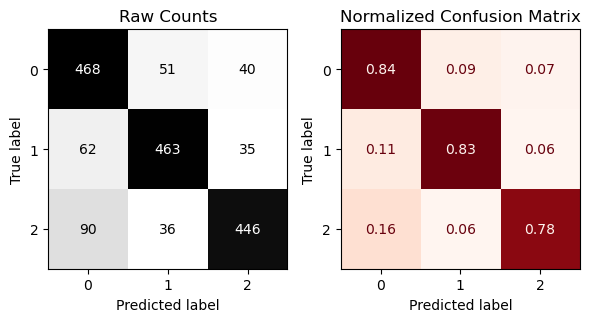


- Evaluating Test Data:
53/53 [==============================] - 6s 106ms/step - loss: 0.6845 - accuracy: 0.8143
{'loss': 0.6844884753227234, 'accuracy': 0.8143110871315002}


In [56]:
# Build the model
model2 = build_gru_model_stack_hierarchy_pool(sequence_vectorizer)

# Fit the model
EPOCHS = 30

# Fit the model
history = model2.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

# Evaluate the model
results = fn.evaluate_classification_network(model2, X_train=train_ds, X_test=test_ds, history=history)


## bi-directional GRU

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 100, 150)          3146400   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         215040    
 l)                                                              
                                                                 
 global_max_pooling1d_3 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                      

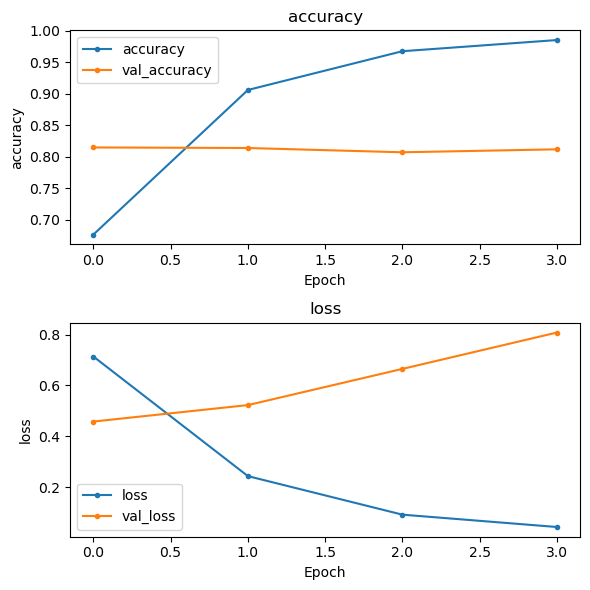


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3906
           1       1.00      0.99      1.00      3952
           2       1.00      1.00      1.00      3975

    accuracy                           0.99     11833
   macro avg       0.99      0.99      0.99     11833
weighted avg       0.99      0.99      0.99     11833



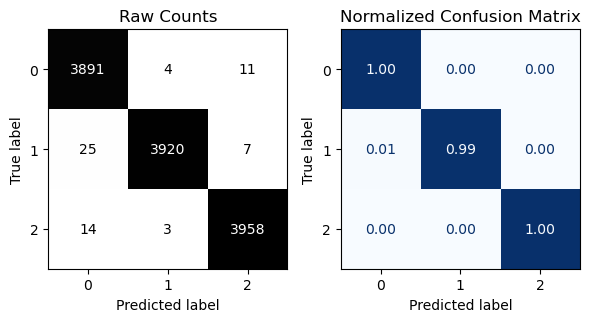


- Evaluating Training Data:
370/370 [==============================] - 21s 57ms/step - loss: 0.0166 - accuracy: 0.9946
{'loss': 0.016639115288853645, 'accuracy': 0.9945914149284363}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       559
           1       0.86      0.76      0.81       560
           2       0.84      0.85      0.85       572

    accuracy                           0.82      1691
   macro avg       0.82      0.82      0.82      1691
weighted avg       0.82      0.82      0.82      1691



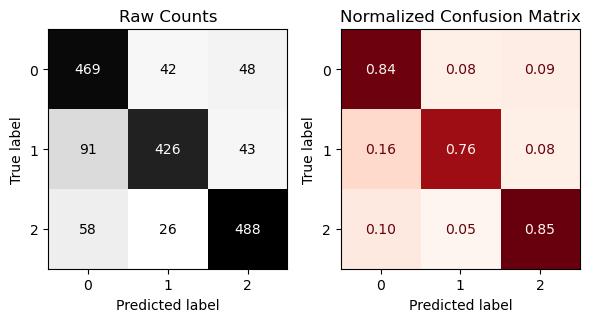


- Evaluating Test Data:
53/53 [==============================] - 3s 56ms/step - loss: 0.7701 - accuracy: 0.8179
{'loss': 0.7700652480125427, 'accuracy': 0.8178592324256897}


In [57]:
# Build the model
model3 = build_gru_model_bi_pool(sequence_vectorizer)

# Fit the model
EPOCHS = 30

# Fit the model
history = model3.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

# Evaluate the model
results = fn.evaluate_classification_network(model3, X_train=train_ds, X_test=test_ds, history=history)


The bi-directional GRU model has the highest accuracy value ( 82% ).